# ECON622: Computational Economics with Data Science Applications

Introduction to Kernel Methods and Gaussian Processes

Jesse Perla (University of British Columbia)

# Overview

## Motivation

-   We have discussed various forms of representation learning and
    function approximation including neural networks, LLS, etc.
-   Another type of approach is called “Instance (or Exemplar) Based
    Learning” of which Kernel Methods and Gaussian Processes are a
    special case
    -   The idea there is that we find approximations from the data by
        keeping track of all observations and use them for inference
    -   These methods are non-parametric in the sense that the number of
        parameters grows with the number of data points
    -   Often Bayesian in practice, which provides regularization and
        inference

## Limitations and Advantages

-   While it seems like this is limiting to cases with small amounts of
    data
    -   We have already explored high-dimensional linear algebra methods
        (e.g., matrix-free, iterative methods, preconditioning)
    -   Many problems in economics do not have an enormous number of
        observations, or we have choice on where the observations occur
-   Typically these methods are used without any “representation
    learning”, but at the end we will give some pointers to how these
    methods generalize to allow representation learning
-   One major benefit of these methods to economists is that they will
    provide **posteriors in a function space**, which we can use for
    inference

## References

-   These notes are a bare-bones introduction. Look to other references
-   [ProbML Book 1](https://probml.github.io/pml-book/book1.html)
    Section 17 and [ProbML Book
    2](https://probml.github.io/pml-book/book2.html) Section 18
-   [Gaussian Processes for Machine
    Learning](http://gaussianprocess.org/gpml/chapters/) a beloved
    textbook available online
-   [UBC CPSC
    340](https://www.cs.ubc.ca/~schmidtm/Courses/340-F22/L22.pdf) and
    [Mark Schmidt’s Topics
    Notes](https://www.cs.ubc.ca/~schmidtm/Courses/5XX-S22/S8.5.pdf)
-   [Machine Learning with Kernel
    Methods](https://members.cbio.mines-paristech.fr/~jvert/svn/kernelcourse/slides/master2017/master2017.pdf)
    course with [youtube
    lectures](https://www.youtube.com/channel/UCotztBOmGVl9pPGIN4YqcRw/videos)

# Normal Equations

## Reminder: Normal Equations for Ridge Regression

-   Let $x \in \mathbb{R}^M$ be observations and
    $X \in \mathbb{R}^{N \times M}$ be the “design” matrix

-   To solve
    $\min_{\theta}\left\{||X \theta - y||^2 + \frac{\lambda}{2}||\theta||^2\right\}$
    for $\lambda \geq 0$, form normal eqs.

    $$
      \theta = (X^{\top}X + \lambda I)^{-1} X^{\top} y
      $$

    -   The $X^{\top}X \in \mathbb{R}^{M\times M}$ is in the “feature”
        space and of size $M$

## The “Other” Normal Equations

-   Without proof, terms out you can rearrange this expression to get
    the “other” normal equations

    $$
      \theta = X^{\top} (X X^{\top} + \lambda I)^{-1} y
      $$

    -   $X X^{\top} \in \mathbb{R}^{N\times N}$ is called the Gram
        matrix
    -   $[X X^{\top}]_{ij} = x_i \cdot x_j$. i.e., pairwise comparisons
        of all data

-   Since $M \ll N$ typically, often a bigger system to solve

    -   But note that we we have rewritten as pairwise comparisons

## Prediction with Kernels

-   Define $\mathcal{K}(x,x') \equiv x \cdot x'$, then

$$
K_{ij} \equiv [X X^{\top}]_{ij} = \mathcal{K}(x_i, x_j)\,\text{ for i = 1, ..., N and j = 1, ..., N}
$$

-   Now, assume we received $P$ new points of data $\tilde{X}$ and want
    to predict $\tilde{y}$

$$
\tilde{K}_{ij} \equiv \mathcal{K}(\tilde{x}_i, x_j),\,\text{ for i = 1, ..., P and j = 1, ..., N}
$$

-   Finally (see linked derivations), can predict with

$$
\tilde{y} = \tilde{K} (K + \lambda I)^{-1} y
$$

## Are Working with Pairwise Comparisons Better?

-   We have rewritten the normal equations in terms of pairwise
    comparisons (the Gram matrix) using some function
    $\mathcal{K}(x,x')\equiv x \cdot x'$
-   Is this computationally preferable for standard applications of OLS?
    -   Probably not unless $M$ is very large
-   The real advantage is that by rewriting the problem in terms of
    pairwise comparisons we can generalize to other functions
    $\mathcal{K}(x,x')$
    -   This is the basis of kernel methods and Gaussian processes

# Features and The Kernel Trick

## Motivation from Classification

-   One starting point here is to consider simple problems of separating
    hyperplanes and binary classification
-   If we transform our data, sometimes into higher dimensions, then we
    can find separating hyperplanes
    -   i.e., with the right “features”, many problems become linear
-   See [CPSC
    340](https://www.cs.ubc.ca/~schmidtm/Courses/340-F22/L22.pdf)

## Transforming with Polynomials

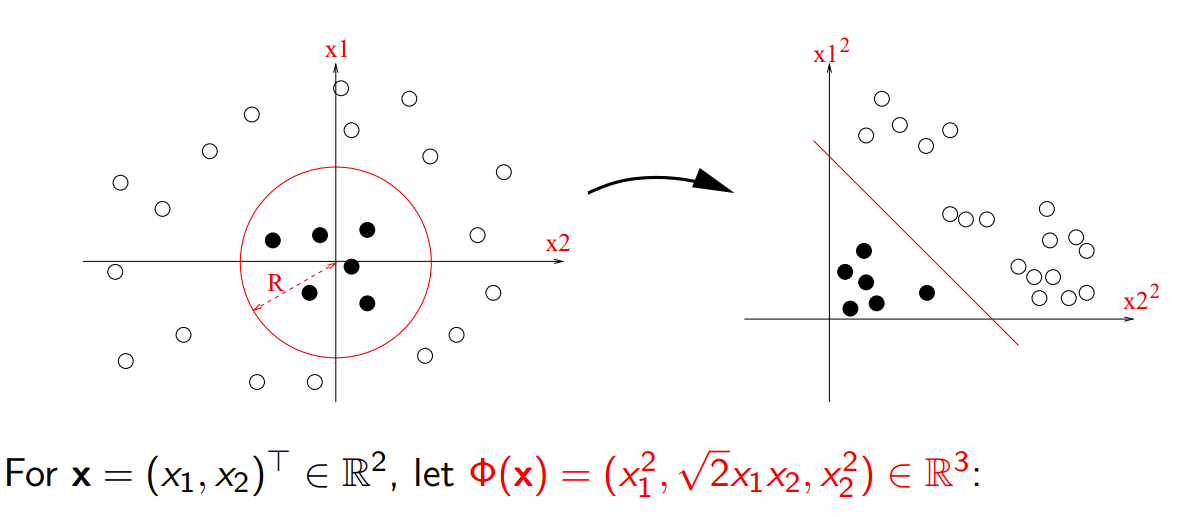

## Do we Need to Form the Features?

-   In the previous with $x \in \mathcal{D}$, we could have:
    -   For all $x\equiv \begin{bmatrix}x_1 & x_2\end{bmatrix}^{\top}$
    -   Calculate
        $x \mapsto \phi(x) \equiv \begin{bmatrix}x_1^2 & \sqrt{2} x_1 x_2 & x_2^2 &\end{bmatrix}^{\top}$
    -   This is creating our new “features”
    -   Then run standard classification algorithms on the new features
-   Define $\mathcal{K}(x,x') \equiv \phi(x) \cdot \phi(x')$
    -   Then use $\mathcal{K}(x,x')$ rather than explicitly designing
        the $\phi(\cdot)$ or calculating $\phi(x)$ for
        $x\in \mathcal{D}$

## Example with Polynomial Kernels

-   Generalizing our previous case,
    $\mathcal{K}(x,x') \equiv (x \cdot x')^2$, to polynomial order $p$
    with cross-products $$
    \mathcal{K}(x,x') \equiv (x \cdot x' + c)^p
    $$

-   The dimensionality of the underlying $\phi(x)$ is combinatorial in
    $p$

-   But now we can just evaluate pairwise $\mathcal{K}(x,x')$, just an
    inner product in $M$ independent of $p$!

-   The cost will be that we need to store the $N \times N$ matrix of
    pairwise comparisons

## The Kernel Trick

-   Note in the previous examples that we never formed the
    $[\phi(x_i)]_{i=1}^N$
-   Even further, we didn’t need to even write down the $\phi(x)$
    function explicitly
-   This is called the “Kernel Trick” and is the basis of Kernel Methods
    -   By choosing a $\mathcal{K}(x,x')$ and using “the other normal
        equations” or similar formulations in other algorithms, you
        implicitly define features $\phi(x)$
    -   In fact, the $\phi(x)$ may be infinite dimensional!
-   The downside is that this will require keeping track of all previous
    observations (as we did with the normal equations forming
    $\tilde{K}$)

## Kernelized Methods

-   Many ML methods are “kernelized”, which means that they are written
    in terms of pairwise comparisons for a given kernel
    -   A kernelized regression just takes the standard
        $\mathcal{K}(x,x') = x \cdot x'$ and lets us swap out with other
        $\mathcal{K}(x,x')$
-   For example, the [Support Vector Machines
    (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine) are
    just kernelized linear classifiers. There kernelized versions of
    PCA, etc.
-   These are powerful because they enable us to work with (often
    linear) methods in a richer feature space
    -   But we have to choose the right sorts of kernels to deliver
        those features
-   Next we build a little intuition on kernels before formalizing GPs

# Kernels

## Kernels as Similarity Measures

-   Our canonical example is $\mathcal{K}(x,x') = x \cdot x'$, which is
    a measure of similarity between $x$ and $x'$. Note that $$
      ||x - x'||_2 = \sqrt{\mathcal{K}(x, x) - 2 \mathcal{K}(x,x') + \mathcal{K}(x', x')}
      $$

-   Fix the lengths $||x||_2 = ||x'||_2 = 1$ then notice that
    $||x - x'||_2 = \sqrt{2 (1 - \mathcal{K}(x,x'))}$

-   As $\mathcal{K}(x,x')$ increases, the distance between $x$ and $x'$
    decreases

-   Also notice that when $\mathcal{K}(x,x') = 0$ (i.e. orthogonal since
    $x \cdot x' = 0$) we maximize the distance between $x$ and $x'$

## Gaussian Kernel

-   One of the most commonly used kernels is called the **radial basis
    function(RBF)** kernel, also known as the Gaussian kernel

$$
\mathcal{K}(x, x';\ell) \equiv \exp(-\frac{||x - x'||_2^2}{2 \ell^2})
$$

-   Note that this uses the Euclidean norm, but we could use other norms
-   The $\ell$ is a scale which determines the distances over which we
    expect differences to matter
-   Kernels which are only a function of some distance between $x$ and
    $x'$ (where the location is irrelevant) are called **stationary
    kernels**

## Example Kernels

-   See [ProbML Book 2](https://probml.github.io/pml-book/book2.html)
    Section 18.2 for more and [Mercer’s
    Theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem) - which
    shows all kernels are associated with an inner product in some
    orthonormal feature space
-   Polynomial kernel $\mathcal{K}(x,x') = (x \cdot x' + c)^p$ for
    $p \in \mathbb{N}$ the polynomial order, including $p=1$ which is
    just the linear kernel
-   Other kernels can be richer and depend on the data (e.g., for
    network, text, image data). Pick your $\mathcal{K}(x,x')$ to
    implement similarity measures
-   Can construct kernels from other kernels
    (e.g. $\exp(\mathcal{K}(x,x'))$ is a valid kernel)
-   Kernel functions could even be neural networks (Deep Kernels)
-   Kernels typically have parameters (e.g., $\ell$ in the Gaussian
    kernel) which must be fit - usually by maximizing the marginal
    likelihood

# Gaussian Processes

## Parameter Space vs. Function Space

-   There are two basic approaches to understanding Gaussian Processes
    (GPs)
    1.  The parameter (or weight) space
    2.  The function space
-   See the [Gaussian Processes for Machine
    Learning](https://gaussianprocess.org/gpml/chapters/RW2.pdf) chapter
    2 for more details
-   Given what you have learned about the kernel trick, you can probably
    understand a lot of the “parameter space” approach yourself.
-   Read both, but we will focus on the function space - which is its
    main advantage

## Gaussian Processes

-   A Gaussian processes are **random functions** where for any finite
    set of points $x_1, ..., x_N \in \mathcal{D}$, the marginal
    distribution $f(x_1), ..., f(x_N)$ is a multivariate Gaussian
    distribution
-   Another way to think about a GP is that it is a [collection of
    random variables, any finite number of which have a joint
    Gaussian](https://gaussianprocess.org/gpml/chapters/RW2.pdf)

## Why Random Functions?

-   The random functions with GPs enable us to have
    -   distributions over functions
    -   priors and posteriors in function spaces
    -   meaningful notions of norms to compare functions and regularize
        them
-   **Uncertainty Quantification**: An issue with ERM-methods (including
    deep learning) is that they find a single function (think MLE or MAP
    solutions)
    -   Alternatives like sample-splitting, cross-validation are limited
        in their ability to quantify uncertainty
-   **Surrogates:** GPs can be used to form probabilistic surrogate
    functions given data. Then we can use those surrogates for
    optimization, uncertainty quantification, etc.

## Bayesian Optimization and Its Generalizations

-   One particularly useful application is Bayesian optimization
-   The idea, used in [Kriging](https://en.wikipedia.org/wiki/Kriging)
    and many [HPO methods](https://docs.wandb.ai/tutorials/sweeps)
    -   For $y = f(x)$ function, which is expensive and blackbox
    -   Take observables $(y_i, x_i)$ and form a GP surrogate
    -   Optimize that surrogate instead of the original function to get
        a new $\tilde{x}$
    -   Evaluate the true function $f(\tilde{x})$ to get $\tilde{y}$
    -   Update the surrogate with the new data and repeat
-   The idea of bayesian optimization and information aquisition
    (i.e. the next point to evaluate) is very general and can be applied
    [to many problems](https://willieneis.github.io/bax-website/)

## Mean and Covariance Functions

-   Unsurprisingly, since Gaussian random variables can be characterized
    by the first two moments, so can GPs

-   Let the mean function be

    $$
    m(x) = \mathbb{E}[f(x)]
    $$

-   And the covariance function (kernel) be

    $$
    \mathcal{K}(x,x') = \mathbb{E}[(f(x) - m(x))(f(x') - m(x'))]
    $$

-   Then we can denote a GP as

    $$
    f(x) \sim GP(m(x), \mathcal{K}(x,x'))
    $$

## Probability of Observables

-   Let $f_X \equiv [f(x_i)]_{i=1}^N$, then because it is jointly
    Gaussian, we can write the probability of the observables as

$$
\begin{aligned}
f_X\,|\,X &\sim \mathcal{N}(\mu_X, K_{XX})\\
\mu_X &\equiv [m(x_i)]_{i=1}^N\\
K_{XX} &\equiv [\mathcal{K}(x_i, x_j)]_{i,j=1}^N
\end{aligned}
$$

## Conditional Forecasts

-   Let $X$ and $f_X$ be observable (without noise in simplest case)

-   Let $\tilde{X}$ be new data where we want to forecast the
    distribution of $f_{\tilde{X}}$

-   See [ProbML Book 2](https://probml.github.io/pml-book/book2.html)
    Section 18.3 for more details

    $$
    \begin{aligned}
    f_{\tilde{X}}\,|\,X, f_X, \tilde{X} &\sim \mathcal{N}(\mu_{\tilde{X}}, \Sigma_{\tilde{X}})\\
    \mu_{\tilde{X}} &\equiv \mu_{\tilde{X}} + K_{X\tilde{X}}^{\top} K_{XX}^{-1} (f_X - \mu_X)\\
    \Sigma_{\tilde{X}} &\equiv K_{\tilde{X}\tilde{X}} - K_{X\tilde{X}}^{\top} K_{XX}^{-1} K_{X\tilde{X}}
    \end{aligned}
    $$

-   Can adjust for noisy observation $y = f(x) + \sigma^2 \epsilon$ for
    $\epsilon \sim \mathcal{N}(0,I)$ easily

## Example Posteriors (ProbML Book 2 Section 18.3.2)

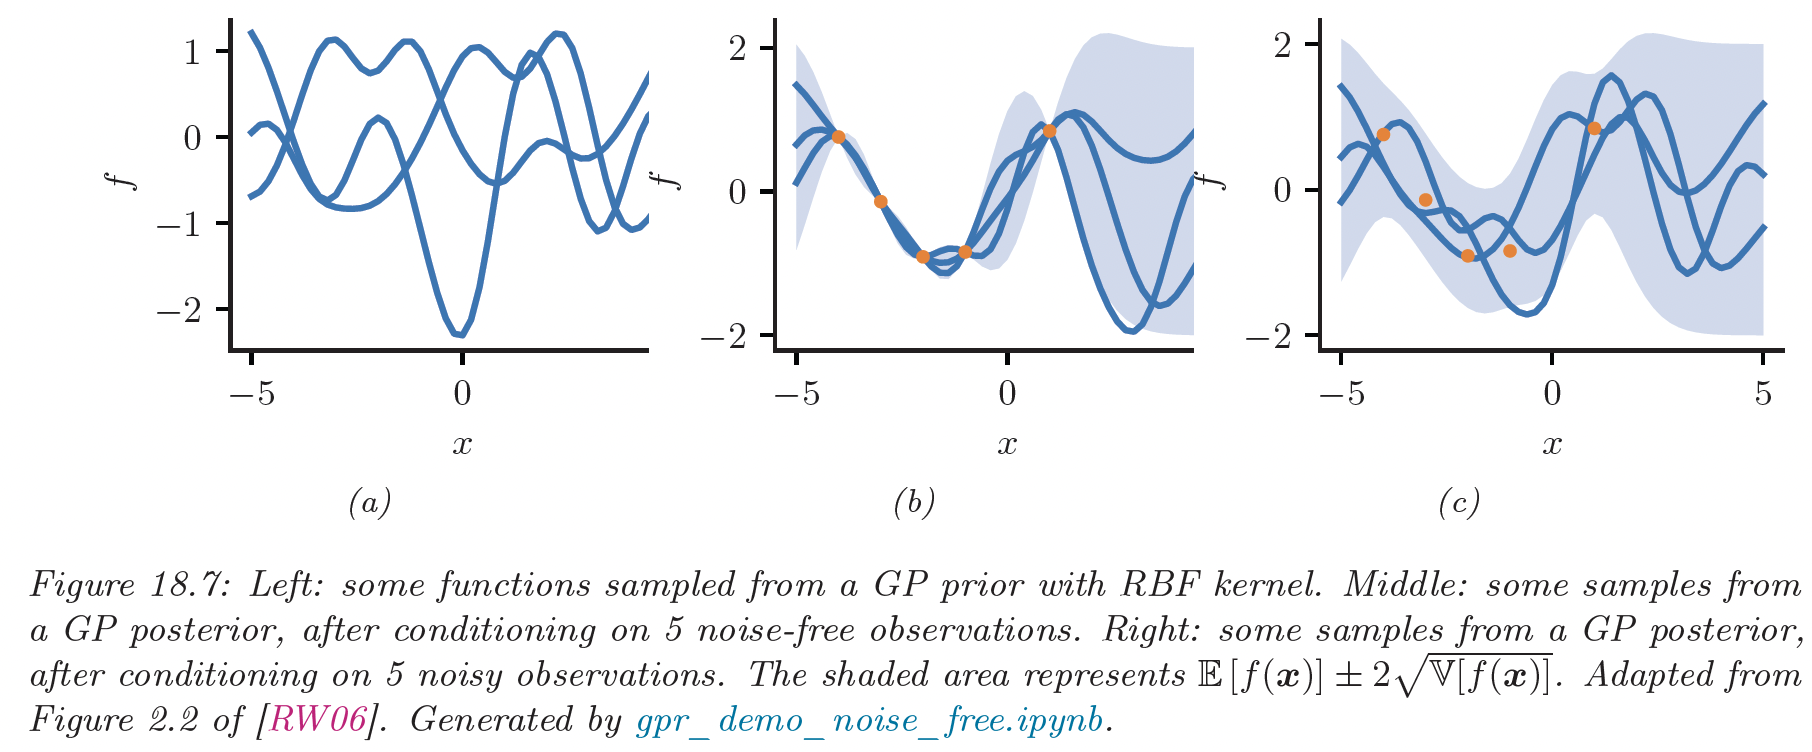

## Reproducing Kernel Hilbert Spaces (RKHS)

-   See [ProbML Book 2](https://probml.github.io/pml-book/book2.html)
    Section 18.3.7 for more details
-   Since we are working with function spaces, and there is an implicit
    inner product $\phi(x)$ associated with the kernel
    $\mathcal{K}(x,x')$
-   We can construct a [Hilbert
    Space](https://en.wikipedia.org/wiki/Hilbert_space) using those
    inner products
    -   Denote the space $\mathcal{H}_{\mathcal{K}}$ for kernel
        $\mathcal{K}$
    -   All inner product spaces induce a norm, so we can write
        $||f||_{\mathcal{H}_{\mathcal{K}}}$

## ERM in a Function Space

-   ERM in a function space with LLS and a norm $||f||$

$$
\min_{f \in \mathcal{F}} \left\{\sum_{n=1}^N (y_n - f(x_n))^2 + \frac{\lambda}{2}||f||\right\}
$$

-   If we use the RKHS function space associated with our kernel, we
    have the **kernel ridge regression**

$$
\min_{f \in \mathcal{H}_{\mathcal{K}}} \left\{\sum_{n=1}^N(y_n - f(x_n))^2 + \frac{\lambda}{2}||f||_{\mathcal{H}_{\mathcal{K}}}\right\}
$$

## Representer Theorem

-   See [ProbML Book 2](https://probml.github.io/pml-book/book2.html)
    Section 18.3.7.3 for more details

-   The **representer theorem** says that a solution to ERM in a
    function space

    $$
    f^* = \arg\min_{f \in \mathcal{H}_{\mathcal{K}}} \left\{\sum_{n=1}^N\ell(f, x_n, y_n) + \frac{\lambda}{2}||f||_{\mathcal{H}_{\mathcal{K}}}\right\}
    $$

    -   Has a solution, for some coefficients $\alpha_n$ a function of
        the data

    $$
    f^*(x) = \sum_{n=1}^N \alpha_n \mathcal{K}(x, x_n)
    $$

    -   See [ProbML Book
        2](https://probml.github.io/pml-book/book2.html) for solutions
        for kernel ridge regression

## Fitting GPs

-   Kernels themselves typically have parameters which must be
    fit/learned/etc. from the data
    -   e.g. the $\ell$ bandwidth in the Gaussian kernel
-   This is typically done with maximum marginal likelihood or MAP
-   See [ProbML Book 2](https://probml.github.io/pml-book/book2.html)
    Section 18.3.5 and 18.6 for more details
-   Crucially, we can “learn the kernel” to mix **representation
    learning** with kernel methods/GPs

## Manually Fitting a GP

-   Assume $m(x) = 0$ for simplicity
-   Remember $K_{XX} \equiv [K_{ij}]_{i,j=1}^N$ and
    $\mathbf{\alpha}\equiv [\alpha_i]_{i=1}^N$ then, $$
    ||f^*||_{\mathcal{H}_{\mathcal{K}}} = \sqrt{f^*\cdot f^*} = \sqrt{\mathbf{\alpha}^{\top} K_{XX} \mathbf{\alpha}}
    $$
-   Substitute into the Representer Theorem $$
    \begin{aligned}
    &\min_{f \in \mathcal{H}_{\mathcal{K}}} \left\{\sum_{n=1}^N\ell(f, x_n, y_n) + \frac{\lambda}{2}||f||_{\mathcal{H}_{\mathcal{K}}}\right\}\\
    &\min_{\mathbf{\alpha}} \left\{\sum_{n=1}^N\ell\left(\sum_{i=1}^N \alpha_n \mathcal{K}(x_n, x_i), x_n, y_n\right) + \sqrt{\frac{\lambda}{2}\mathbf{\alpha}^{\top} K_{XX}\mathbf{\alpha}}\right\}
    \end{aligned}
    $$

## Mean Functions and Hyperparameters

-   Kernels often have hyperparameters $\theta$ (e.g., bandwidth) and
    parametric $m(x;\eta, \theta)$
-   Let
    $K_{XX}(\theta) \equiv [K(x_i, x_j;\theta)]_{i,j=1}^N, \mathbf{x} \equiv [x_n]_{n=1}^N, \mathbf{y} \equiv [y_n]_{n=1}^N,$
    and $\mathbf{m}(\eta;\theta)\equiv [m(x;\theta, \eta)]_{n=1}^N$
-   Often loss is written in terms of residuals,
    $\mathbf{r}(f, \mathbf{x}, \mathbf{y})$ where
    $\sum_{n=1}^N \ell(f, x_n, y_n) = ||\mathbf{r}(f, \mathbf{x}, \mathbf{y})||_2^2$
    -   Then we can usually write the optimization problem as $$
        \begin{aligned}
        \min_{\mathbf{\alpha}, \eta} &\left\{ ||\mathbf{r}(K_{XX}(\theta)\cdot \mathbf{\alpha}+ \mathbf{m}(\eta, \theta);\theta, \eta)||_2^2 + \sqrt{\frac{\lambda}{2}\mathbf{\alpha}^{\top}\cdot K_{XX}(\theta)\cdot\mathbf{\alpha}}\right\}\\
        \end{aligned}
        $$
    -   Then an outer optimization process for $\theta$!

## Ridgeless Kernel Solution

-   Recall the min-norm, ridgeless OLS: $$
    \lim_{\lambda \to 0} \arg\max_{\alpha} ||\alpha \cdot X - y||^2_2 + \lambda ||\alpha||^2_2 = \arg\max_{\alpha} ||\alpha||_2^2 \text{ s t. } \alpha \cdot X = y
    $$

-   With interpolating problem (i.e., $\mathbf{r}(\cdot) = 0$ possible)
    take $\lambda \to 0$ in Representer

    $$
      \begin{aligned}
      \min_{\mathbf{\alpha}, \eta} &\left\{\mathbf{\alpha}^{\top}K_{XX}(\theta)\mathbf{\alpha}\right\}\\
      \text{s.t. }\, & \mathbf{r}(K_{XX}(\theta)\cdot \mathbf{\alpha}+ \mathbf{m}(\eta, \theta);\theta, \eta) = 0
      \end{aligned}
    $$

    -   i.e. the min-norm (according to
        $|f||_{\mathcal{H}_{\mathcal{K}}}$) interpolating solution
    -   Can stack inequalities, additional constraints etc.
    -   With linear (in $\mathcal{H}_{\mathcal{K}}$)
        residuals/constraints can use very fast LQ solvers
    -   More explicit and reliable than the inductive bias in neural
        networks

# GPytorch

## GPytorch

-   One can manually create kernels and run the optimizer, or use a
    package such as
    [GPyTorch](https://docs.gpytorch.ai/en/stable/examples/01_Exact_GPs/Simple_GP_Regression.html)
-   See
    [examples/gpytorch_regression.py](examples/gpytorch_regression.py)

In [1]:
import math
import torch
import gpytorch
from gpytorch.kernels import ScaleKernel, RBFKernel, LinearKernel
from matplotlib import pyplot as plt

## Example Training Data

In [2]:
# Training data is 100 points in [0,1] inclusive regularly spaced
train_x = torch.linspace(0, 1, 100)
# True function is sin(2*pi*x) with Gaussian noise
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)

## Choosing Kernels

-   Kernels can be created from other kernels. e.g., given
    $\mathcal{K}(x,x')$,
    -   $\exp(\mathcal{K}(x,x'))$ is a valid kernel
    -   $C \mathcal{K}(x,x')$ for a fixed scaling $C > 0$
    -   See [the docs](https://docs.gpytorch.ai/en/stable/kernels.html)
        for more
-   Also, we can provide a “learnable” mean, $m(x)$ for the process
    -   e.g. `gpytorch.means.ConstantMean()`, but could be function of
        $x$

## Simple GP Model with exact inference

In [3]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

## Setup likelihood and Loss

In [4]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

## Run the Optimizer

In [5]:
for i in range(100):
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    if i % 10 == 0:
      print(f"Iter={i}, Loss={loss.item()}")
    optimizer.step()
model.eval() # evaluation mode
likelihood.eval()    

Iter=0, Loss=0.9246092438697815
Iter=10, Loss=0.49558719992637634
Iter=20, Loss=0.14863097667694092
Iter=30, Loss=-0.09639503806829453
Iter=40, Loss=-0.10420241951942444
Iter=50, Loss=-0.11034904420375824
Iter=60, Loss=-0.11888084560632706
Iter=70, Loss=-0.11811713874340057
Iter=80, Loss=-0.11977791041135788
Iter=90, Loss=-0.11959525942802429

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

## Visualize Results

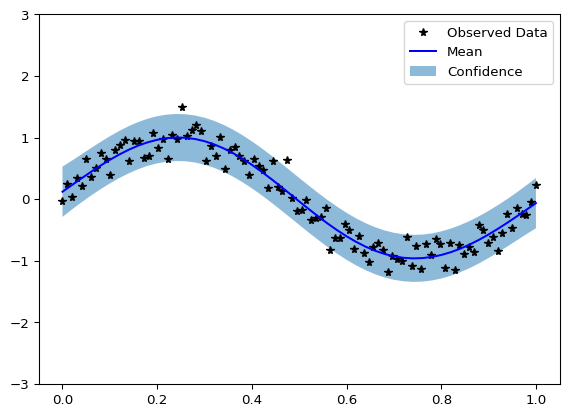

In [6]:
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(0, 1, 51)
    observed_pred = likelihood(model(test_x))

    fig, ax = plt.subplots()
    lower, upper = observed_pred.confidence_region()
    ax.plot(train_x.numpy(), train_y.numpy(), 'k*')
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])    